# Importation 

In [1]:
#Loading Dataset and getting information from Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel('AgencyDataset.xlsx', na_values='?')


# Data exploration

In [2]:
print(data.shape)
print(data.head())
print(data.describe())
# Checking missing values
print(data.isnull().sum().sum()) 
df=pd.DataFrame(data)
print(df.columns)
print(df[df['bathrooms'].isna()])
print(df.isnull().values.any())

(4600, 18)
        date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0         3       1.50         1340      7912     1.5   
1 2014-05-02  2384000.0         5       2.50         3650      9050     2.0   
2 2014-05-02   342000.0         3       2.00         1930     11947     1.0   
3 2014-05-02   420000.0         3       2.25         2000      8030     1.0   
4 2014-05-02   550000.0         4       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          200

# Visualization des données

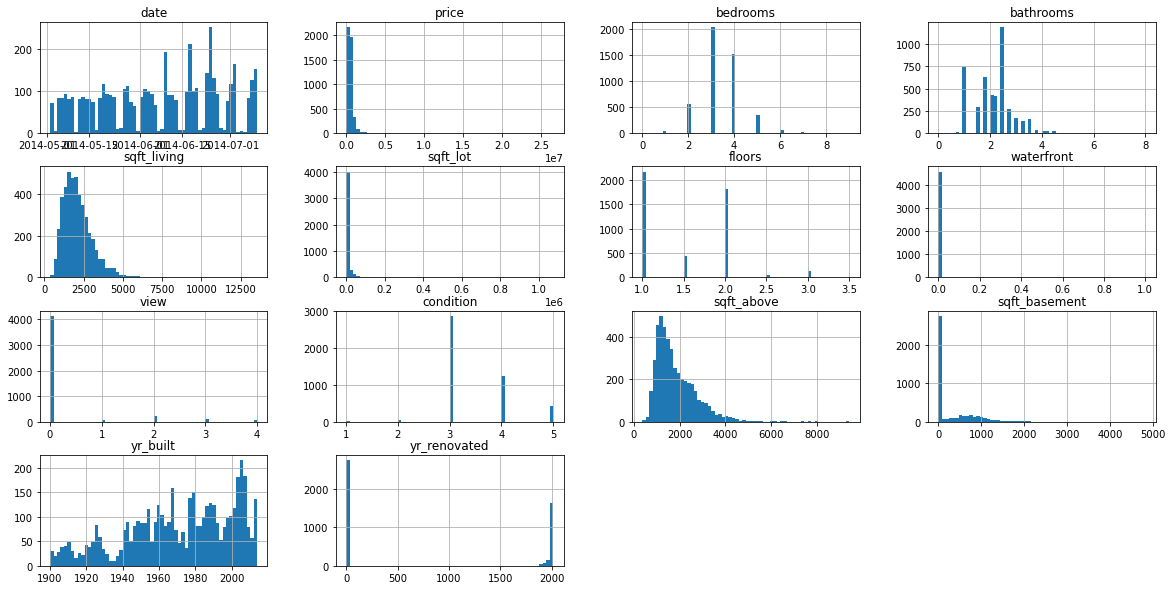

In [3]:
#Visualization
hist = df.hist(bins=60 , figsize=(20,10))

# transformation

In [4]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [5]:
# Exclude the country column (all values = US)
print(df['country'].values)
df = df.drop("country",axis = 1)


['USA' 'USA' 'USA' ... 'USA' 'USA' 'USA']


In [6]:
#Remove zeros in price 
df['price'].median()
# On remplace par la mediane car la mediane is better than the mean 
#val
print(df[(df['price']!=0)].median()) # to show the median value of the price column
df['price']=df['price'].replace(0,465000.00)
df
#verification
pricenull=df[(df['price']==0)]
pricenull


price            465000.00
bedrooms              3.00
bathrooms             2.25
sqft_living        1970.00
sqft_lot           7680.00
floors                1.50
waterfront            0.00
view                  0.00
condition             3.00
sqft_above         1590.00
sqft_basement         0.00
yr_built           1976.00
yr_renovated          0.00
dtype: float64


C:\Users\Khadija\AppData\Local\Temp/ipykernel_8628/3279500113.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df[(df['price']!=0)].median()) # to show the median value of the price column
C:\Users\Khadija\AppData\Local\Temp/ipykernel_8628/3279500113.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[(df['price']!=0)].median()) # to show the median value of the price column


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip


In [7]:
#Replace the values of bathrooms,bedrooms and floors
df['bathrooms']=df['bathrooms'].apply(np.floor).astype(int)
df['bedrooms']=df['bedrooms'].apply(np.floor).astype(int)
df['floors']=df['floors'].apply(np.floor).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int32         
 3   bathrooms      4600 non-null   int32         
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   int32         
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [8]:
#convertir (country/city/statezip/street) vers entier
encoder = OrdinalEncoder()
df['street'] = encoder.fit_transform(df['street'].values.reshape(-1, 1))
df['city'] = encoder.fit_transform(df['city'].values.reshape(-1, 1))
df['statezip'] = encoder.fit_transform(df['statezip'].values.reshape(-1, 1))
#df['country'] = encoder.fit_transform(df['country'].values.reshape(-1, 1))
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02,3.130000e+05,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,1522.0,36.0,62.0
1,2014-05-02,2.384000e+06,5,2,3650,9050,2,0,4,5,3370,280,1921,0,3899.0,35.0,58.0
2,2014-05-02,3.420000e+05,3,2,1930,11947,1,0,0,4,1930,0,1966,0,2291.0,18.0,26.0
3,2014-05-02,4.200000e+05,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,4263.0,3.0,7.0
4,2014-05-02,5.500000e+05,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,4352.0,31.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,3447.0,35.0,62.0
4596,2014-07-09,5.343333e+05,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,960.0,3.0,6.0
4597,2014-07-09,4.169042e+05,3,2,3010,7014,2,0,0,3,3010,0,2009,0,4033.0,32.0,37.0
4598,2014-07-10,2.034000e+05,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,3498.0,35.0,71.0


In [9]:
#Transform the Date 
df['date']
df['year'] = df['date'].dt.year
df['year']
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop('date', axis=1, inplace=True)

In [10]:
#Verify the column of year
YearAfter = df.year > 2014 
YearBefore = df.year < 2014
print(YearAfter.sum())
print(YearBefore.sum())
#Drop the column Year
df.drop('year', axis=1, inplace=True)

0
0


In [11]:
df = df[((data['yr_renovated'] == 0) | ((data['yr_renovated'] != 0) & (data['yr_built'] < data['yr_renovated'])))]

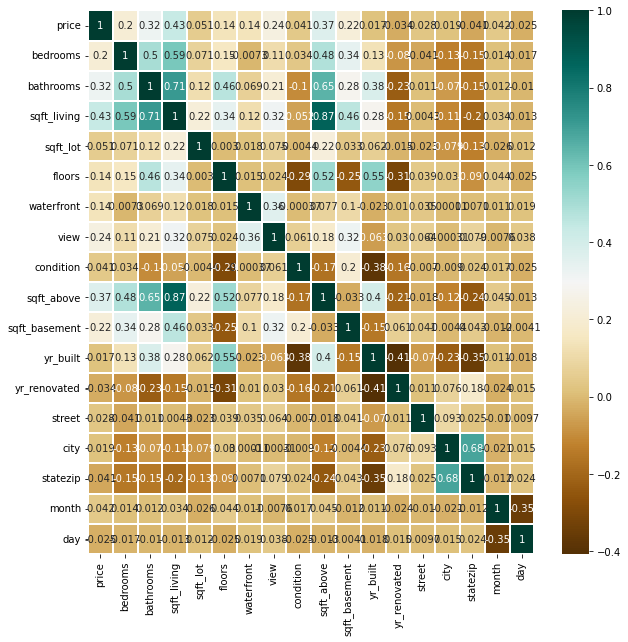

In [12]:
#Matrice de correlation avant transformation
corr_data = df.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(corr_data, annot=True,cmap='BrBG', linewidths=0.2)
plt.show()

# Outliers

Verifier les surfaces et supprimer les observations non réalistes

In [13]:
# Verify if the surface of the house is bigger than sqft_living,above,basement
living = df.sqft_lot >= df.sqft_living
above = df.sqft_lot >= df.sqft_above
basement = df.sqft_lot >= df.sqft_basement
#delete the values 
df = df[living & above & basement]

La date yr_built doit etre inferieur à la date de renovation yr_renovated

In [14]:
# verifier y_built date is less than renovated date
df = df[((df['yr_renovated'] == 0) | ((df['yr_built'] != 0) & (df['yr_built'] < df['yr_renovated'])))]


Affichage des outliers

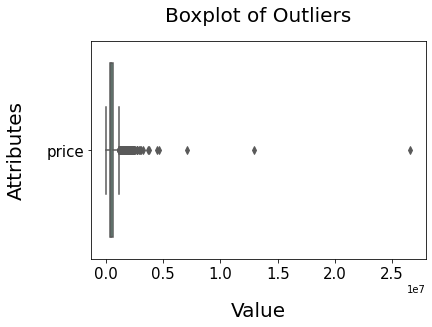

In [15]:
#Show outliers 
ax = sns.boxplot(data = df[['price']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

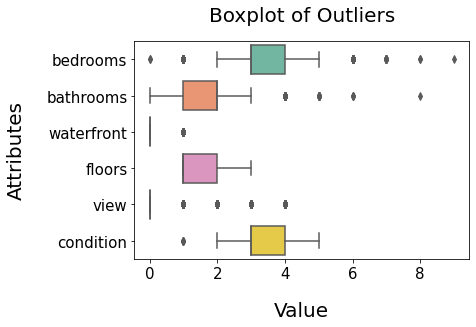

In [16]:
ax = sns.boxplot(data = df[[ 'bedrooms', 'bathrooms', 'waterfront','floors' ,'view', 'condition']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

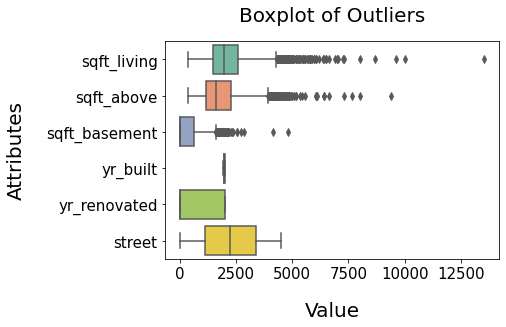

In [17]:
ax = sns.boxplot(data = df[[ 'sqft_living','sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'street']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

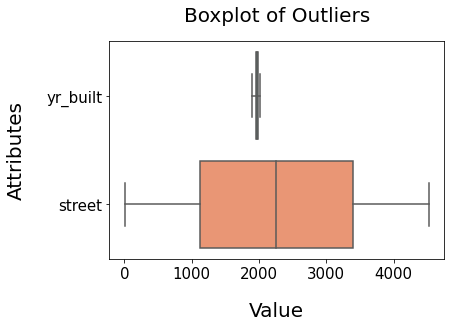

In [18]:
ax = sns.boxplot(data = df[['yr_built','street']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

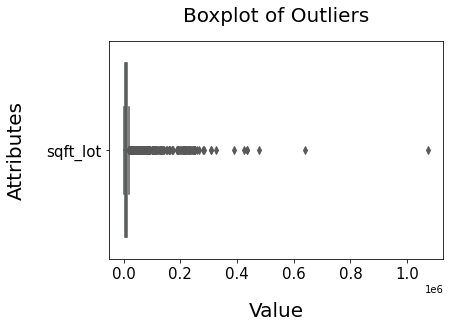

In [19]:
ax = sns.boxplot(data = df[[ 'sqft_lot']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

# Remove outliers of price

In [20]:
#Finding the IQR
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)
iqr = percentile75 - percentile25
# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Finding Outliers
df[df['price'] > upper_limit]
df[df['price'] < lower_limit]
#Trimming
new_df = df[df['price'] < upper_limit]
new_df.shape
#Capping
new_df1 = df.copy()
new_df1['price'] = np.where(
    new_df1['price'] > upper_limit,
    upper_limit,
    np.where(
        new_df1['price'] < lower_limit,
        lower_limit,
        new_df1['price']
    )
)
new_df1['price'].describe()

count    4.252000e+03
mean     5.207619e+05
std      2.579186e+05
min      7.800000e+03
25%      3.249875e+05
50%      4.650000e+05
75%      6.557500e+05
max      1.151894e+06
Name: price, dtype: float64

C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


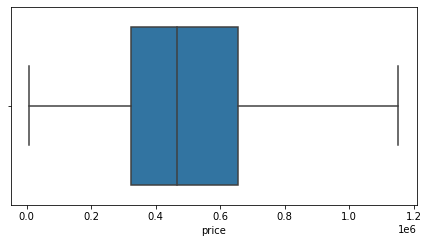

In [21]:
#Price after removing the outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.boxplot(new_df1['price'])
plt.show()

# Remove Outliers of bedrooms 

count    4252.000000
mean        3.403104
std         0.856923
min         1.500000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.500000
Name: bedrooms, dtype: float64


C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


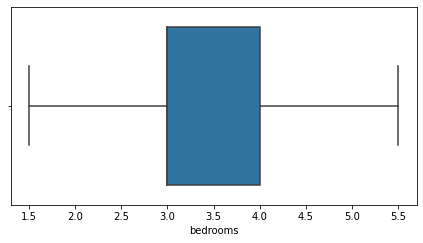

In [22]:
#Finding the IQR
percentile25 = new_df1['bedrooms'].quantile(0.25)
percentile75 = new_df1['bedrooms'].quantile(0.75)
iqr = percentile75 - percentile25
# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Finding Outliers
new_df1[new_df1['bedrooms'] > upper_limit]
new_df1[new_df1['bedrooms'] < lower_limit]
#Trimming
new_df = new_df1[new_df1['bedrooms'] < upper_limit]
new_df.shape
#Capping
new_df2 = new_df1.copy()
new_df2['bedrooms'] = np.where(
    new_df2['bedrooms'] > upper_limit,
    upper_limit,
    np.where(
        new_df2['bedrooms'] < lower_limit,
        lower_limit,
        new_df2['bedrooms']
    )
)
print(new_df2['bedrooms'].describe())
#bedrooms after removing the outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.boxplot(new_df2['bedrooms'])
plt.show()

count    4252.000000
mean        1.741063
std         0.694250
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.500000
Name: bathrooms, dtype: float64


C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


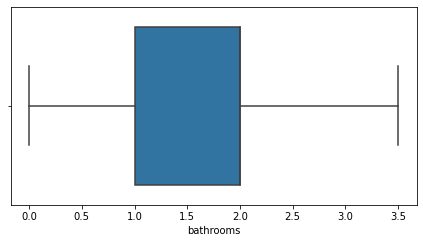

In [23]:
#Finding the IQR
percentile25 = new_df2['bathrooms'].quantile(0.25)
percentile75 = new_df2['bathrooms'].quantile(0.75)
iqr = percentile75 - percentile25
# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Finding Outliers
new_df2[new_df2['bathrooms']> upper_limit]
new_df2[new_df2['bathrooms'] < lower_limit]
#Trimming
new_df = new_df2[new_df2['bathrooms'] < upper_limit]
new_df.shape
#Capping
new_df3 = new_df2.copy()
new_df3['bathrooms'] = np.where(
    new_df3['bathrooms'] > upper_limit,
    upper_limit,
    np.where(
        new_df3['bathrooms'] < lower_limit,
        lower_limit,
        new_df3['bathrooms']
    )
)
print(new_df3['bathrooms'].describe())
#bedrooms after removing the outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.boxplot(new_df3['bathrooms'])
plt.show()

# Remove outliers of sqft_living

count    4252.000000
mean     2113.345249
std       860.114851
min       370.000000
25%      1480.000000
50%      1982.000000
75%      2610.000000
max      4305.000000
Name: sqft_living, dtype: float64


C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


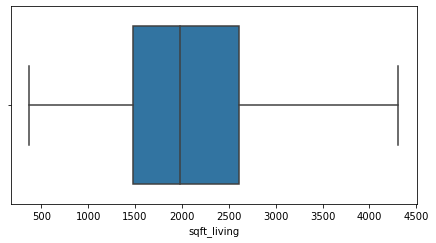

In [24]:
#Finding the IQR
percentile25 = new_df3['sqft_living'].quantile(0.25)
percentile75 = new_df3['sqft_living'].quantile(0.75)
iqr = percentile75 - percentile25
# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Finding Outliers
new_df3[new_df3['sqft_living']> upper_limit]
new_df3[new_df3['sqft_living']< lower_limit]
#Trimming
new_df = new_df3[new_df3['sqft_living'] < upper_limit]
new_df.shape
#Capping
new_df4 = new_df3.copy()
new_df4['sqft_living'] = np.where(
    new_df4['sqft_living'] > upper_limit,
    upper_limit,
    np.where(
        new_df4['sqft_living'] < lower_limit,
        lower_limit,
        new_df4['sqft_living']
    )
)
print(new_df4['sqft_living'].describe())
#bedrooms after removing the outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.boxplot(new_df4['sqft_living'])
plt.show()

# Remove outliers of sqft_above

count    4252.000000
mean     1801.040452
std       794.307591
min       370.000000
25%      1180.000000
50%      1590.000000
75%      2280.000000
max      3930.000000
Name: sqft_above, dtype: float64


C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


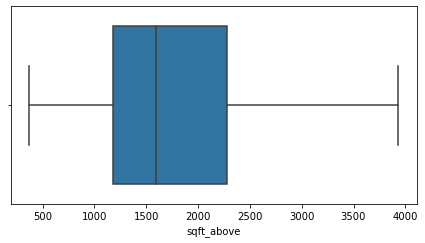

In [25]:
#Finding the IQR
percentile25 = new_df4['sqft_above'].quantile(0.25)
percentile75 = new_df4['sqft_above'].quantile(0.75)
iqr = percentile75 - percentile25
# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Finding Outliers
new_df4[new_df4['sqft_above']> upper_limit]
new_df4[new_df4['sqft_above']< lower_limit]
#Trimming
new_df = new_df4[new_df4['sqft_above'] < upper_limit]
new_df.shape
#Capping
new_df5 = new_df4.copy()
new_df5['sqft_above'] = np.where(
    new_df5['sqft_above'] > upper_limit,
    upper_limit,
    np.where(
        new_df5['sqft_above'] < lower_limit,
        lower_limit,
        new_df5['sqft_above']
    )
)
print(new_df5['sqft_above'].describe())
#bedrooms after removing the outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.boxplot(new_df5['sqft_above'])
plt.show()

# Remove outliers of sqft_basement

count    4252.000000
mean      315.820555
std       447.963198
min         0.000000
25%         0.000000
50%         0.000000
75%       640.000000
max      1600.000000
Name: sqft_basement, dtype: float64


C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


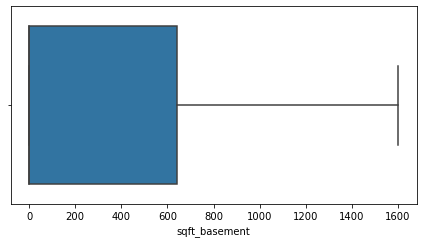

In [26]:
#Finding the IQR
percentile25 = new_df5['sqft_basement'].quantile(0.25)
percentile75 = new_df5['sqft_basement'].quantile(0.75)
iqr = percentile75 - percentile25
# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Finding Outliers
new_df5[new_df5['sqft_basement']> upper_limit]
new_df5[new_df5['sqft_basement']< lower_limit]
#Trimming
new_df = new_df5[new_df5['sqft_basement'] < upper_limit]
new_df.shape
#Capping
new_df6 = new_df5.copy()
new_df6['sqft_basement'] = np.where(
    new_df6['sqft_basement'] > upper_limit,
    upper_limit,
    np.where(
        new_df6['sqft_basement'] < lower_limit,
        lower_limit,
        new_df6['sqft_basement']
    )
)
print(new_df6['sqft_basement'].describe())
#bedrooms after removing the outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.boxplot(new_df6['sqft_basement'])
plt.show()

# Remove outliers of sqft_lot

count     4252.000000
mean      9373.604186
std       5398.715531
min        833.000000
25%       5400.000000
50%       7947.000000
75%      11410.250000
max      20425.625000
Name: sqft_lot, dtype: float64


C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


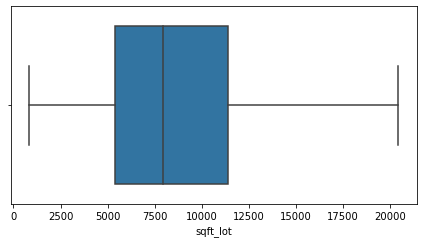

In [27]:
#Finding the IQR
percentile25 = new_df6['sqft_lot'].quantile(0.25)
percentile75 = new_df6['sqft_lot'].quantile(0.75)
iqr = percentile75 - percentile25
# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Finding Outliers
new_df6[new_df6['sqft_lot'] >upper_limit]
new_df6[new_df6['sqft_lot']< lower_limit]
#Trimming
new_df = new_df6[new_df6['sqft_lot'] < upper_limit]
new_df.shape
#Capping
new_df7 = new_df6.copy()
new_df7['sqft_lot'] = np.where(
    new_df7['sqft_lot']  > upper_limit,
    upper_limit,
    np.where(
        new_df7['sqft_lot']  < lower_limit,
        lower_limit,
        new_df7['sqft_lot'] 
    )
)
print(new_df7['sqft_lot'] .describe())
#bedrooms after removing the outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.boxplot(new_df7['sqft_lot'] )
plt.show()

<AxesSubplot:>

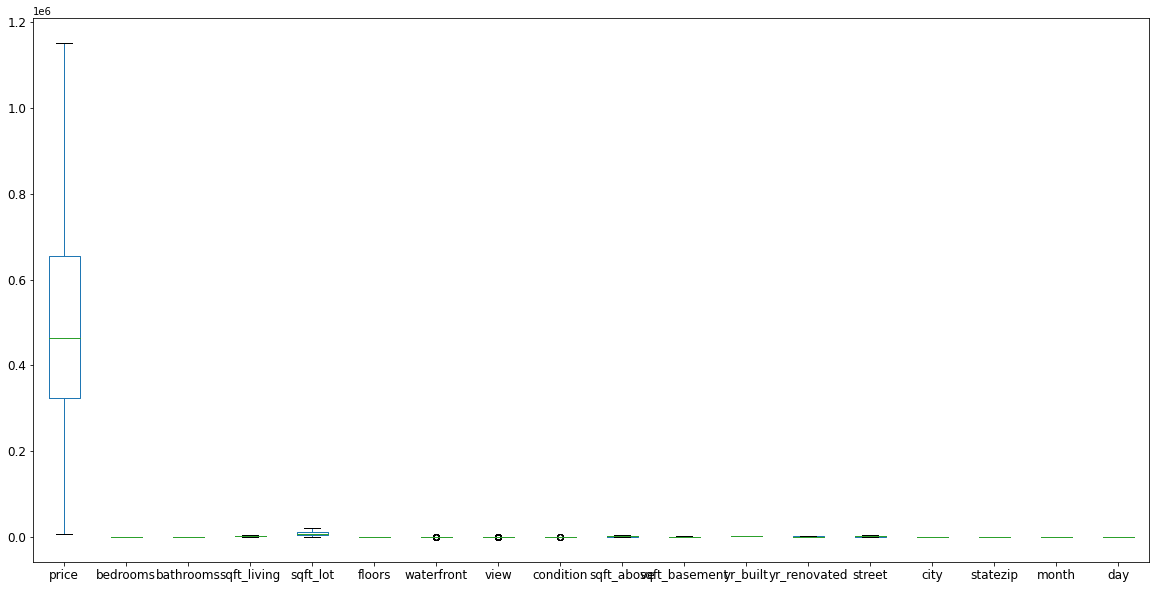

In [28]:
new_df7.boxplot(figsize = (20,10), fontsize = 12, grid = False)

In [29]:
new_df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4252 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4252 non-null   float64
 1   bedrooms       4252 non-null   float64
 2   bathrooms      4252 non-null   float64
 3   sqft_living    4252 non-null   float64
 4   sqft_lot       4252 non-null   float64
 5   floors         4252 non-null   int32  
 6   waterfront     4252 non-null   int64  
 7   view           4252 non-null   int64  
 8   condition      4252 non-null   int64  
 9   sqft_above     4252 non-null   float64
 10  sqft_basement  4252 non-null   float64
 11  yr_built       4252 non-null   int64  
 12  yr_renovated   4252 non-null   int64  
 13  street         4252 non-null   float64
 14  city           4252 non-null   float64
 15  statezip       4252 non-null   float64
 16  month          4252 non-null   int64  
 17  day            4252 non-null   int64  
dtypes: float

In [30]:
new_df7.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'month',
       'day'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
features =list(new_df7.columns[0:18])
print(features)
# extracting out the features
x = new_df7.loc[:, features].values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'month', 'day']


array([[-0.80562742, -0.47046468, -1.06755508, ...,  1.114171  ,
        -1.11485061, -1.47343168],
       [ 2.44730699,  1.8637428 ,  0.3730175 , ...,  0.92470879,
        -1.11485061, -1.47343168],
       [-0.69317564, -0.47046468,  0.3730175 , ..., -0.59098885,
        -1.11485061, -1.47343168],
       ...,
       [-0.40272367, -0.47046468,  0.3730175 , ..., -0.06996779,
         1.81400006, -0.66771387],
       [-1.23061761,  0.69663906,  0.3730175 , ...,  1.54046096,
         1.81400006, -0.55261132],
       [-1.16392207, -0.47046468,  0.3730175 , ..., -0.59098885,
         1.81400006, -0.55261132]])

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components=pca.fit_transform(x_standardized)
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, new_df7[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'month',
       'day']]], axis = 1)
print(finalDf) 

      principal component 1  principal component 2         price  bedrooms  \
0                 -2.401723               0.023260  3.130000e+05       3.0   
1                  3.282996               4.276291  1.151894e+06       5.0   
2                 -0.278478              -0.868713  3.420000e+05       3.0   
3                 -0.295198              -0.164022  4.200000e+05       3.0   
4                 -0.372872               1.163328  5.500000e+05       4.0   
...                     ...                    ...           ...       ...   
4595                    NaN                    NaN  3.081667e+05       3.0   
4596                    NaN                    NaN  5.343333e+05       3.0   
4597                    NaN                    NaN  4.169042e+05       3.0   
4598                    NaN                    NaN  2.034000e+05       4.0   
4599                    NaN                    NaN  2.206000e+05       3.0   

      bathrooms  sqft_living  sqft_lot  floors  waterfront  vie

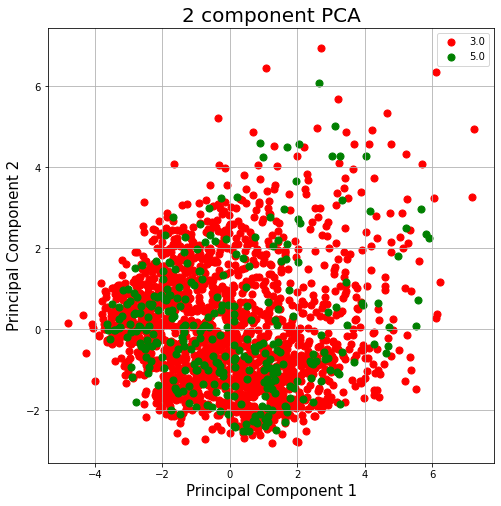

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf['bedrooms']
colors = ['r', 'g']
for target, color in zip(targets,colors):
 indicesToKeep = finalDf['bedrooms'] == target
 ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
 , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# Score

In [34]:
#score
array = new_df7.values
X1 = array[:,0:18]
Y1 = array[:,8]
Y1=Y1.astype('int')
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X1, Y1)
fit.scores_

array([9.99440460e+06, 4.73787527e+00, 3.99372091e+01, 2.94522469e+04,
       1.71144522e+05, 8.43974850e+01, 2.55353500e+00, 3.93971646e+01,
       5.81118845e+02, 8.00533625e+04, 1.14154268e+05, 2.92761656e+02,
       2.37334717e+05, 7.83959619e+03, 1.61574049e+02, 3.77114325e+02,
       1.97973616e-01, 2.18702728e+01])

# Affichage de la matrice de correlation

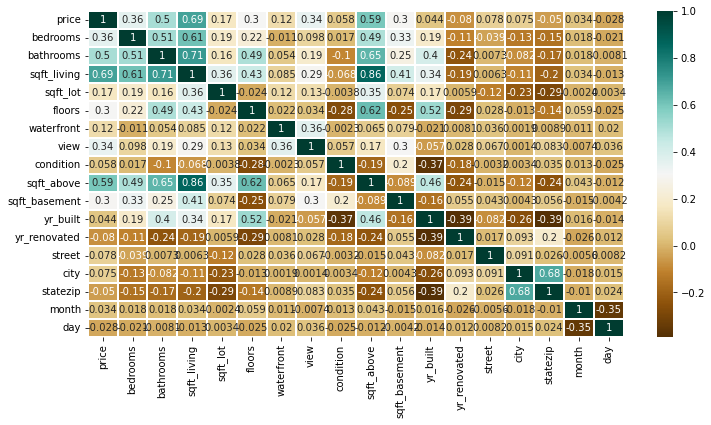

In [35]:
#Affichage Heat map 
corr_data = new_df7.corr(method='pearson')
plt.figure(figsize=(12, 6))
sns.heatmap(corr_data, annot=True,cmap='BrBG', linewidths=0.2)
plt.show()

# Vizualisation des données

Text(0.5, 1.0, 'Relation of Price to Bedroom and Bathroom')

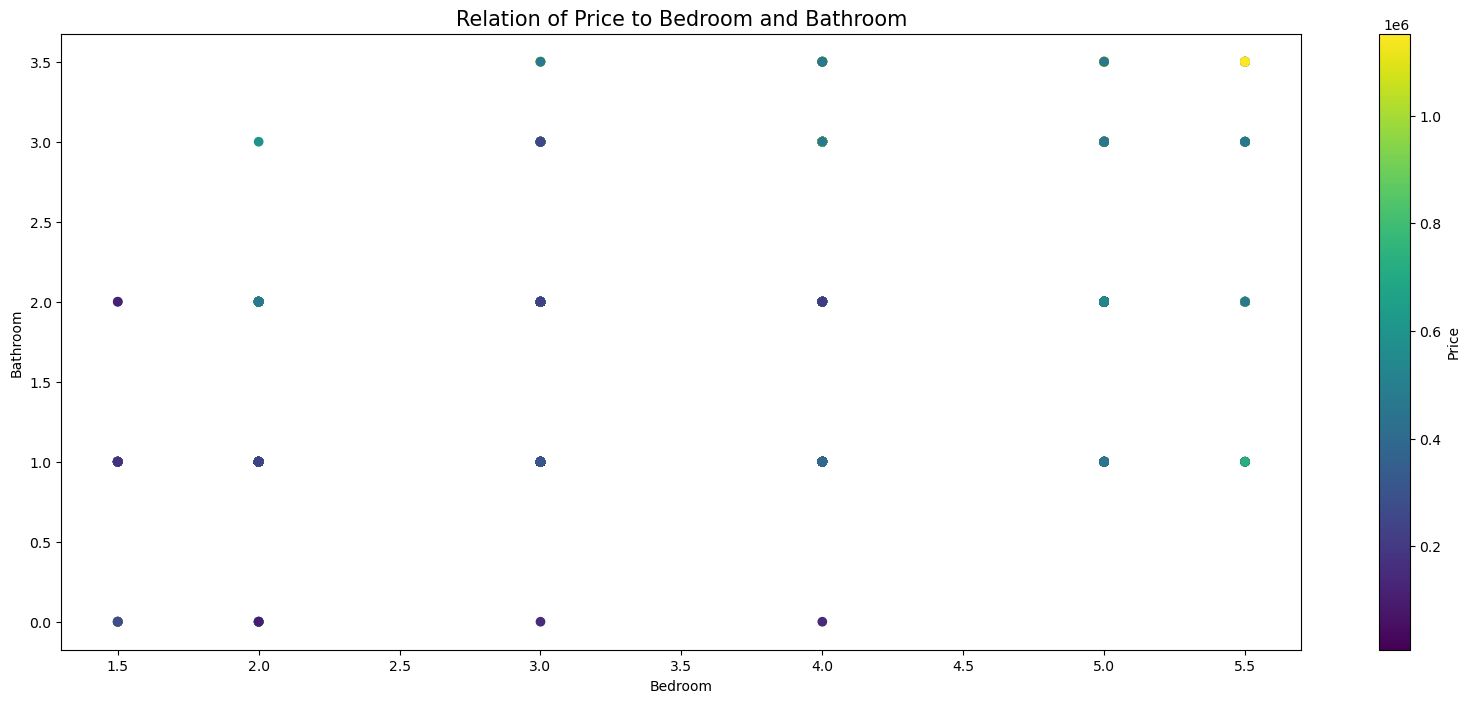

In [36]:
plt.style.use('default')
plt.figure(figsize=(20, 8))
x, y, z = new_df7["bedrooms"], new_df7["bathrooms"], new_df7["price"]
sc = plt.scatter(x, y, c = z)
plt.xlabel("Bedroom")
plt.ylabel("Bathroom")
plt.colorbar(sc, label = "Price")
plt.title("Relation of Price to Bedroom and Bathroom", fontsize = 15)

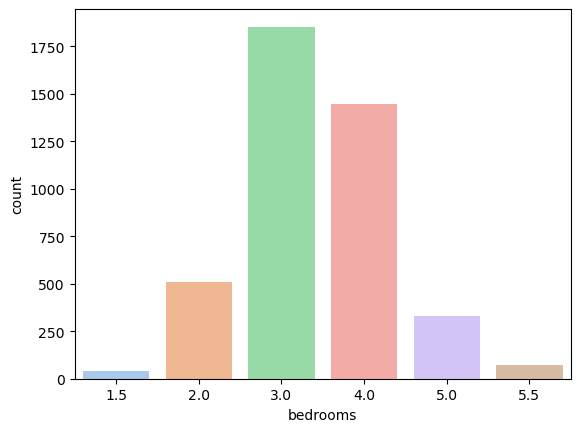

In [37]:
sns.countplot(x="bedrooms",data=new_df7,palette="pastel")
plt.show()

C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

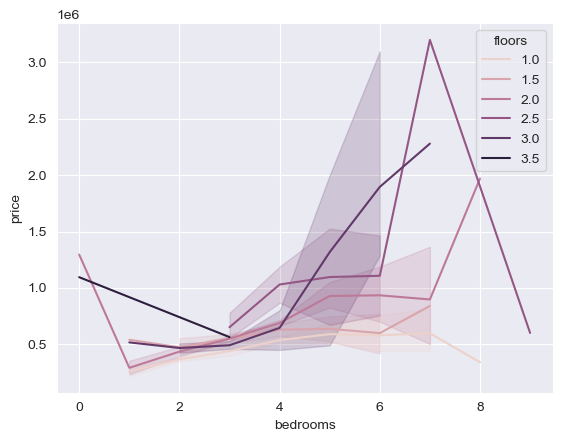

In [47]:
sns.lineplot(data['bedrooms'],data['price'], hue =data["floors"])

C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

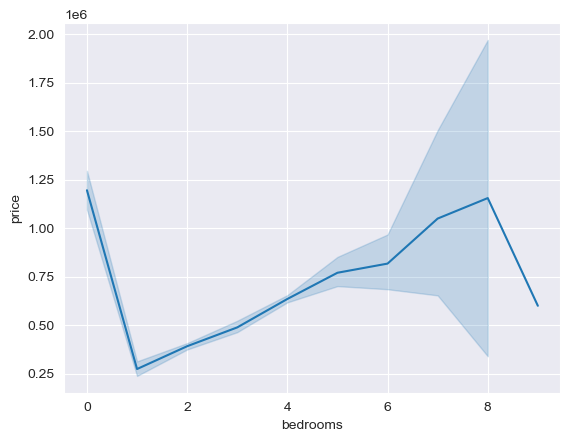

In [48]:
sns.lineplot( data['bedrooms'], data['price'])

C:\Users\Khadija\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

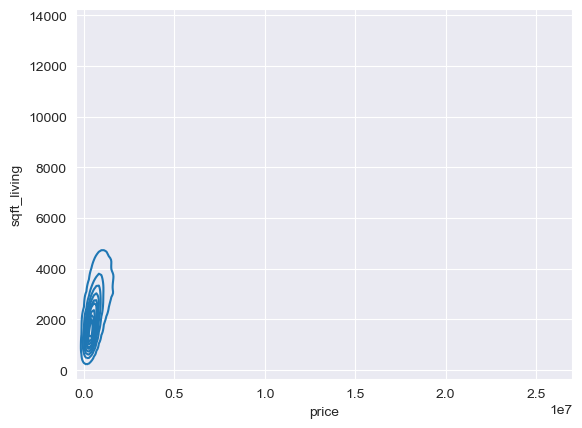

In [50]:
sns.kdeplot( data['price'], data['sqft_living'])

C:\Users\Khadija\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

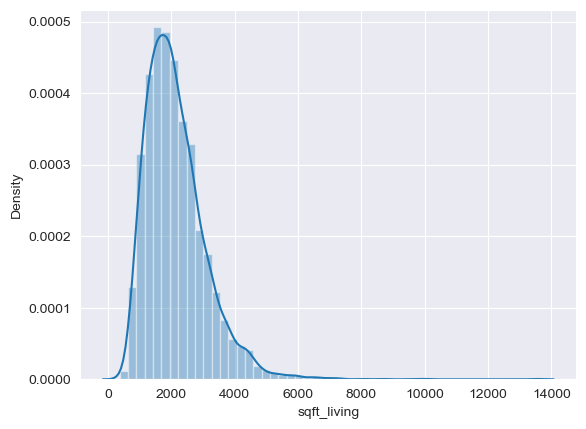

In [51]:
sns.distplot( data['sqft_living'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

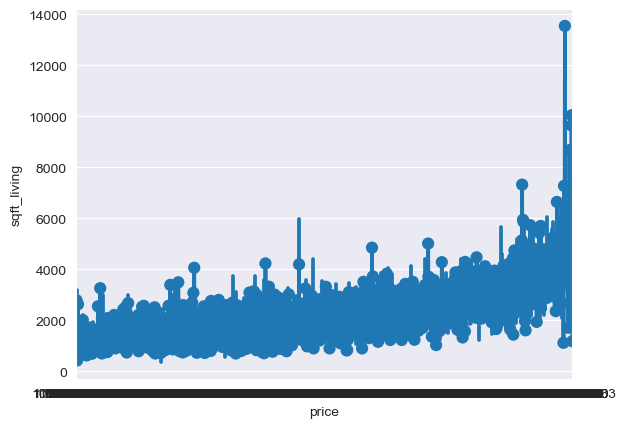

In [56]:
sns.pointplot(x = "price", y = "sqft_living", data = data)